In [1]:
%matplotlib inline

from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

plt.rcParams['figure.figsize'] = [10, 10]

def show_image(image, title, flip_x_axis=False):
    if flip_x_axis:
        image = np.fliplr(image)
    plt.imshow(image, cmap=plt.get_cmap("gray"))
    plt.title(title)
    plt.colorbar()
    plt.show()
    
def normalise(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

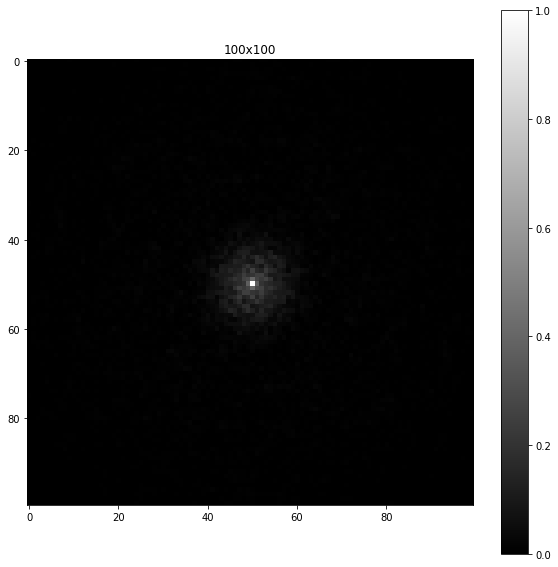

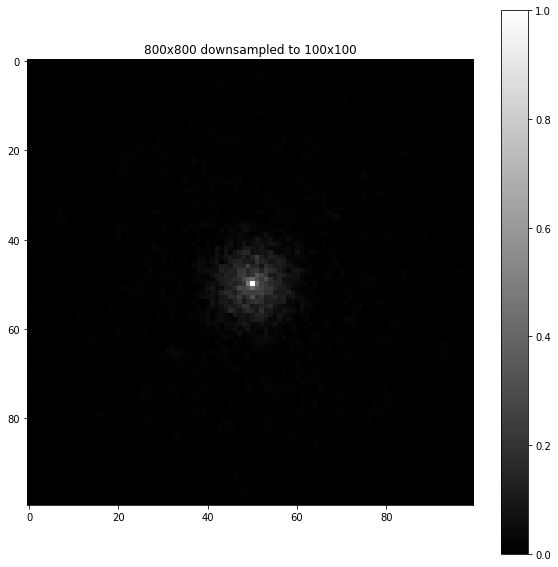

Img A Max: (50, 50)
Img B Max: (50, 50)


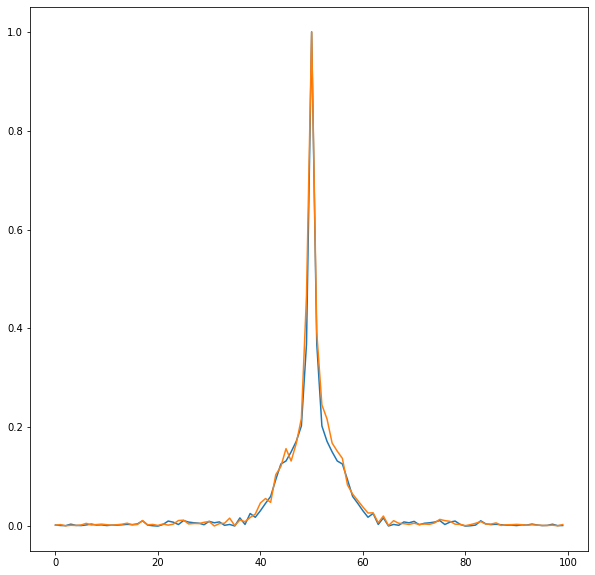

In [24]:
img_a = "../datasets/gleam_small/images/direct_psf_ts_0_29_100x100.bin"
img_a = np.fromfile(img_a, dtype=np.float32)
img_a = img_a.reshape(100, 100)
img_a = normalise(img_a)
show_image(img_a, "100x100")

img_b = "../datasets/gleam_small/images/direct_psf_ts_0_29_800x800.bin"
img_b = np.fromfile(img_b, dtype=np.float32)
img_b = img_b.reshape(800, 800)
img_b = resize(img_b, (99, 99), anti_aliasing=False, order=5)
img_b = np.pad(img_b, ((1, 0), (1, 0))) # pad with new 0th row/col to ensure trimming from centre
img_b = normalise(img_b)
show_image(img_b, "800x800 downsampled to 100x100")

# diff = np.absolute(img_a - img_b)
# show_image(diff, "Abs Diff")

img_a_max = np.unravel_index(np.argmax(img_a, axis=None), img_a.shape)
img_b_max = np.unravel_index(np.argmax(img_b, axis=None), img_b.shape)
print(f"Img A Max: {img_a_max}")
print(f"Img B Max: {img_b_max}")

plt.plot(img_a[50, :])
plt.plot(img_b[50, :])
plt.show()

# Notes for tomorrow:
# - I am not sure if the downsampling from 800px to 100px is causing some issue with the algorithm
# - Does it make sense to use wavelets to "downsample" instead of interpolation methods like bilinear? (https://pywavelets.readthedocs.io/en/latest/)
# - Adding to the above note: Image Downsampling and Upsampling Methods (Abdou Youssef)
# - Can I get this technique working via Docker to run on the titan, where there are more computing resources available.
# - Implement a basic resource calculation, regarding memory utilisation for different algorithm configurations (i.e., l, m, n, d, etc.)